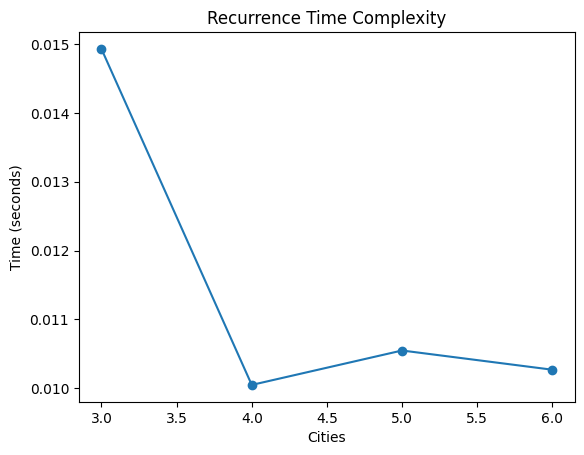

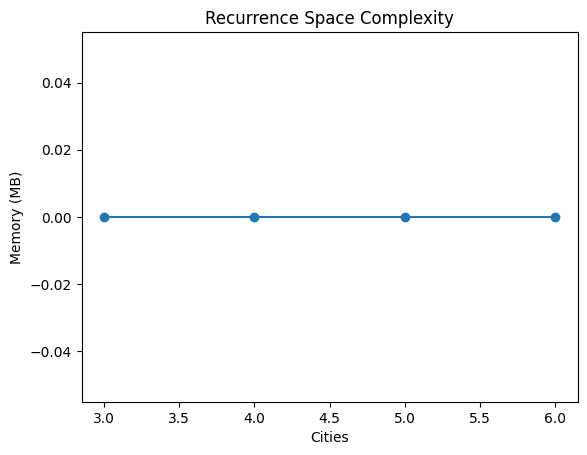

In [1]:
!pip install memory_profiler

import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
from functools import lru_cache

# Distance matrix (same as assignment)
locations = ["Warehouse", "C1", "C2", "C3"]
dist = [
    [0,4,8,6],
    [4,0,5,7],
    [8,5,0,3],
    [6,7,3,0]
]

n = len(locations)

@lru_cache(None)
def recur_cost(current, visited):
    if visited == (1<<n)-1:
        return dist[current][0]   # return to warehouse

    ans = float('inf')
    for nxt in range(n):
        if not (visited & (1<<nxt)):
            ans = min(ans, dist[current][nxt] + recur_cost(nxt, visited | (1<<nxt)))
    return ans


def test_recurrence():
    return recur_cost(0, 1)

# Time & Memory Profiling
times = []
mems = []
sizes = [3,4,5,6]

for size in sizes:
    start = time.time()
    mem = memory_usage((test_recurrence,), max_iterations=1)
    end = time.time()

    times.append(end - start)
    mems.append(max(mem) - min(mem))

# Plotting
plt.plot(sizes, times, marker='o')
plt.xlabel("Cities")
plt.ylabel("Time (seconds)")
plt.title("Recurrence Time Complexity")
plt.show()

plt.plot(sizes, mems, marker='o')
plt.xlabel("Cities")
plt.ylabel("Memory (MB)")
plt.title("Recurrence Space Complexity")
plt.show()
